In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import contextily 

In [2]:
csv = pd.read_csv('final/final_8_20.csv')

<AxesSubplot:>

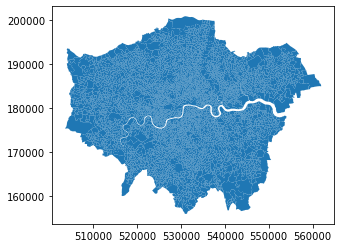

In [3]:
# read in LSOA boundries
LSOA = gpd.read_file("Data/LSOA_boundries/LSOA_2011_London_gen_MHW.shp")
# check
LSOA.plot()

In [4]:
LSOA_cleaned = LSOA[['LSOA11CD','geometry']]

In [5]:
final_gdf =LSOA_cleaned.merge(csv, on='LSOA11CD',how='left')

In [6]:
# read cycle infra data
cycle_routes = pd.read_json('Data/CycleRoutes.json')

# transform to gdf
cycle_routes_gdf = gpd.GeoDataFrame.from_features(cycle_routes["features"],crs=4326)

cycle_routes_gdf = cycle_routes_gdf.to_crs(27700)

In [7]:
cycle_routes_gdf

geometry  OBJECTID Label  \
0    MULTILINESTRING ((525557.673 180543.196, 52554...       130   C27   
1    LINESTRING (539076.151 178102.543, 539105.456 ...       131    C4   
2    LINESTRING (543446.676 186334.804, 543477.298 ...       132   C42   
3    LINESTRING (530690.755 180675.210, 530941.405 ...       133     C   
4    LINESTRING (533001.773 179343.187, 532949.338 ...       134     C   
..                                                 ...       ...   ...   
125  LINESTRING (527667.870 185680.984, 527719.421 ...       255    C6   
126  MULTILINESTRING ((530661.755 180658.210, 53063...       256   C47   
127  MULTILINESTRING ((536030.259 169929.112, 53606...       257   C18   
128  LINESTRING (529231.772 184130.291, 529254.932 ...       258   C50   
129  LINESTRING (530690.755 180675.210, 530681.755 ...       259   C10   

      Route_Name   Status Programme_  Programme    Shape_Leng  
0    Cycleway 27     Open   20220722  Cycleways  18178.310676  
1     Cycleway 4     Open   20220722  Cycleways   2171.117462  
2    Cycleway 42  Planned   20220722  Cycleways   2827.917396  
3       Cycleway     Open   20220722  Cycleways    490.560606  
4       Cycleway  Planned   20220722  Cycleways    377.333950  
..           ...      ...        ...        ...           ...  
125   Cycleway 6  Planned   20220722  Cycleways   1948.736173  
126  Cycleway 47     Open   20220722  Cycleways   1420.613700  
127  Cycleway 18     Open   20220722  Cycleways   4876.804524  
128  Cycleway 50     Open   20220722  Cycleways   1132.913758  
129  Cycleway 10     Open   20220722  Cycleways   2190.964316  

[130 rows x 8 columns]

In [8]:
cycle_routes_gdf.Shape_Leng.sum()

403742.6215006802

In [9]:
cycle_routes_gdf[cycle_routes_gdf.Status == 'Open']['Shape_Leng'].sum()

340056.361225618

In [10]:
# read cycle infra data
cycle_lanes = pd.read_json('Data/cycle_infra/cycle_lane_track.json')

# transform to gdf
cycle_lanes_gdf = gpd.GeoDataFrame.from_features(cycle_lanes["features"],crs=4326)

cycle_lanes_gdf = cycle_lanes_gdf.to_crs(27700)

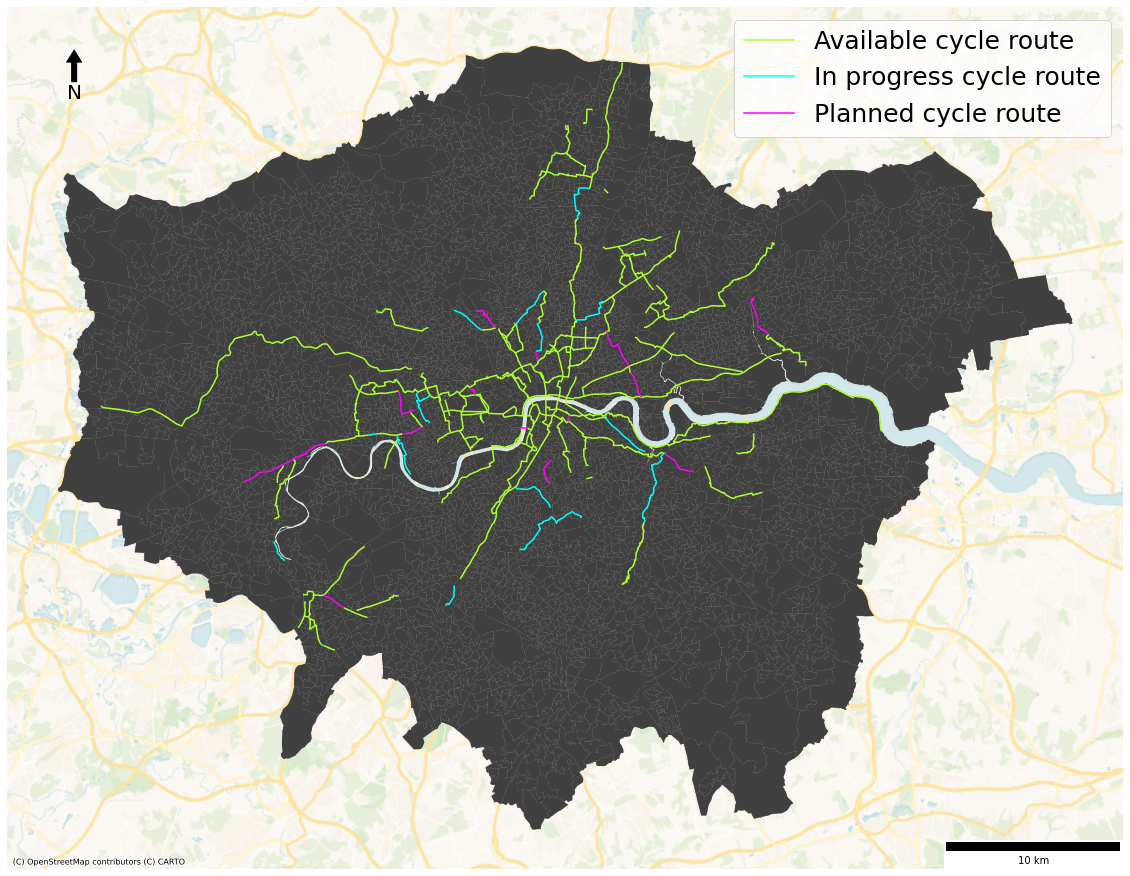

In [11]:
## plot
from matplotlib_scalebar.scalebar import ScaleBar
fig,ax = plt.subplots(1,1,figsize=(20,20)) 

LSOA.plot(ax=ax,color = 'black',linewidth=0.5)
# osm_27700.plot(ax=ax,linewidth=0.1,color = 'white')

cycle_routes_gdf[cycle_routes_gdf['Status'] == 'Open'].plot(ax=ax,
                                                                color='greenyellow',
                                                                linewidth=1.5)
cycle_routes_gdf[cycle_routes_gdf['Status'] == 'In Progress'].plot(ax=ax,
                                                                       color='cyan',
                                                                       linewidth=1.5)
cycle_routes_gdf[cycle_routes_gdf['Status'] == 'Planned'].plot(ax=ax,
                                                                   color='fuchsia',
                                                                   linewidth=1.5)
# cycle_lanes_gdf.plot(ax=ax,color='r',linewidth=1.5,alpha=0.5)
LSOA.plot(ax=ax,color = 'grey', linewidth=1.5,alpha=0.5)

line1 = Line2D([0], [0], label='Available cycle route', color='greenyellow')
line2 = Line2D([0], [0], label='In progress cycle route', color='cyan')
line3 = Line2D([0], [0], label='Planned cycle route', color='fuchsia')
# red_patch = mpatches.Patch(color='red', label='The red data')
# loc='best', bbox_to_anchor=(0.995, 0.15)
plt.legend(handles=[line1,line2,line3],prop={'size': 25})

# Add basemap
contextily.add_basemap(
    ax, 
    crs=cycle_routes_gdf.crs, 
    source=contextily.providers.CartoDB.VoyagerNoLabels
)

x, y, arrow_length = 0.06, 0.95, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

scale1 = ScaleBar(dx=1,location='lower right')

ax.axis("off")
ax.add_artist(scale1)
# ax.set_title('Cycle routes', fontsize=25)
plt.savefig('cycle_routes.png',bbox_inches='tight')

In [12]:
final_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   LSOA11CD                             4835 non-null   object  
 1   geometry                             4835 non-null   geometry
 2   all_routes_presence_400_15           4835 non-null   int64   
 3   all_routes_density_400_15            4835 non-null   float64 
 4   all_distance_15_400                  4835 non-null   float64 
 5   distance_400_15                      4835 non-null   float64 
 6   routes_presence_400                  4835 non-null   int64   
 7   routes_density_400                   4835 non-null   float64 
 8   IMD                                  4835 non-null   float64 
 9   Commuters                            4835 non-null   float64 
 10  persons_hec_13                       4835 non-null   int64   
 11  Mixed    

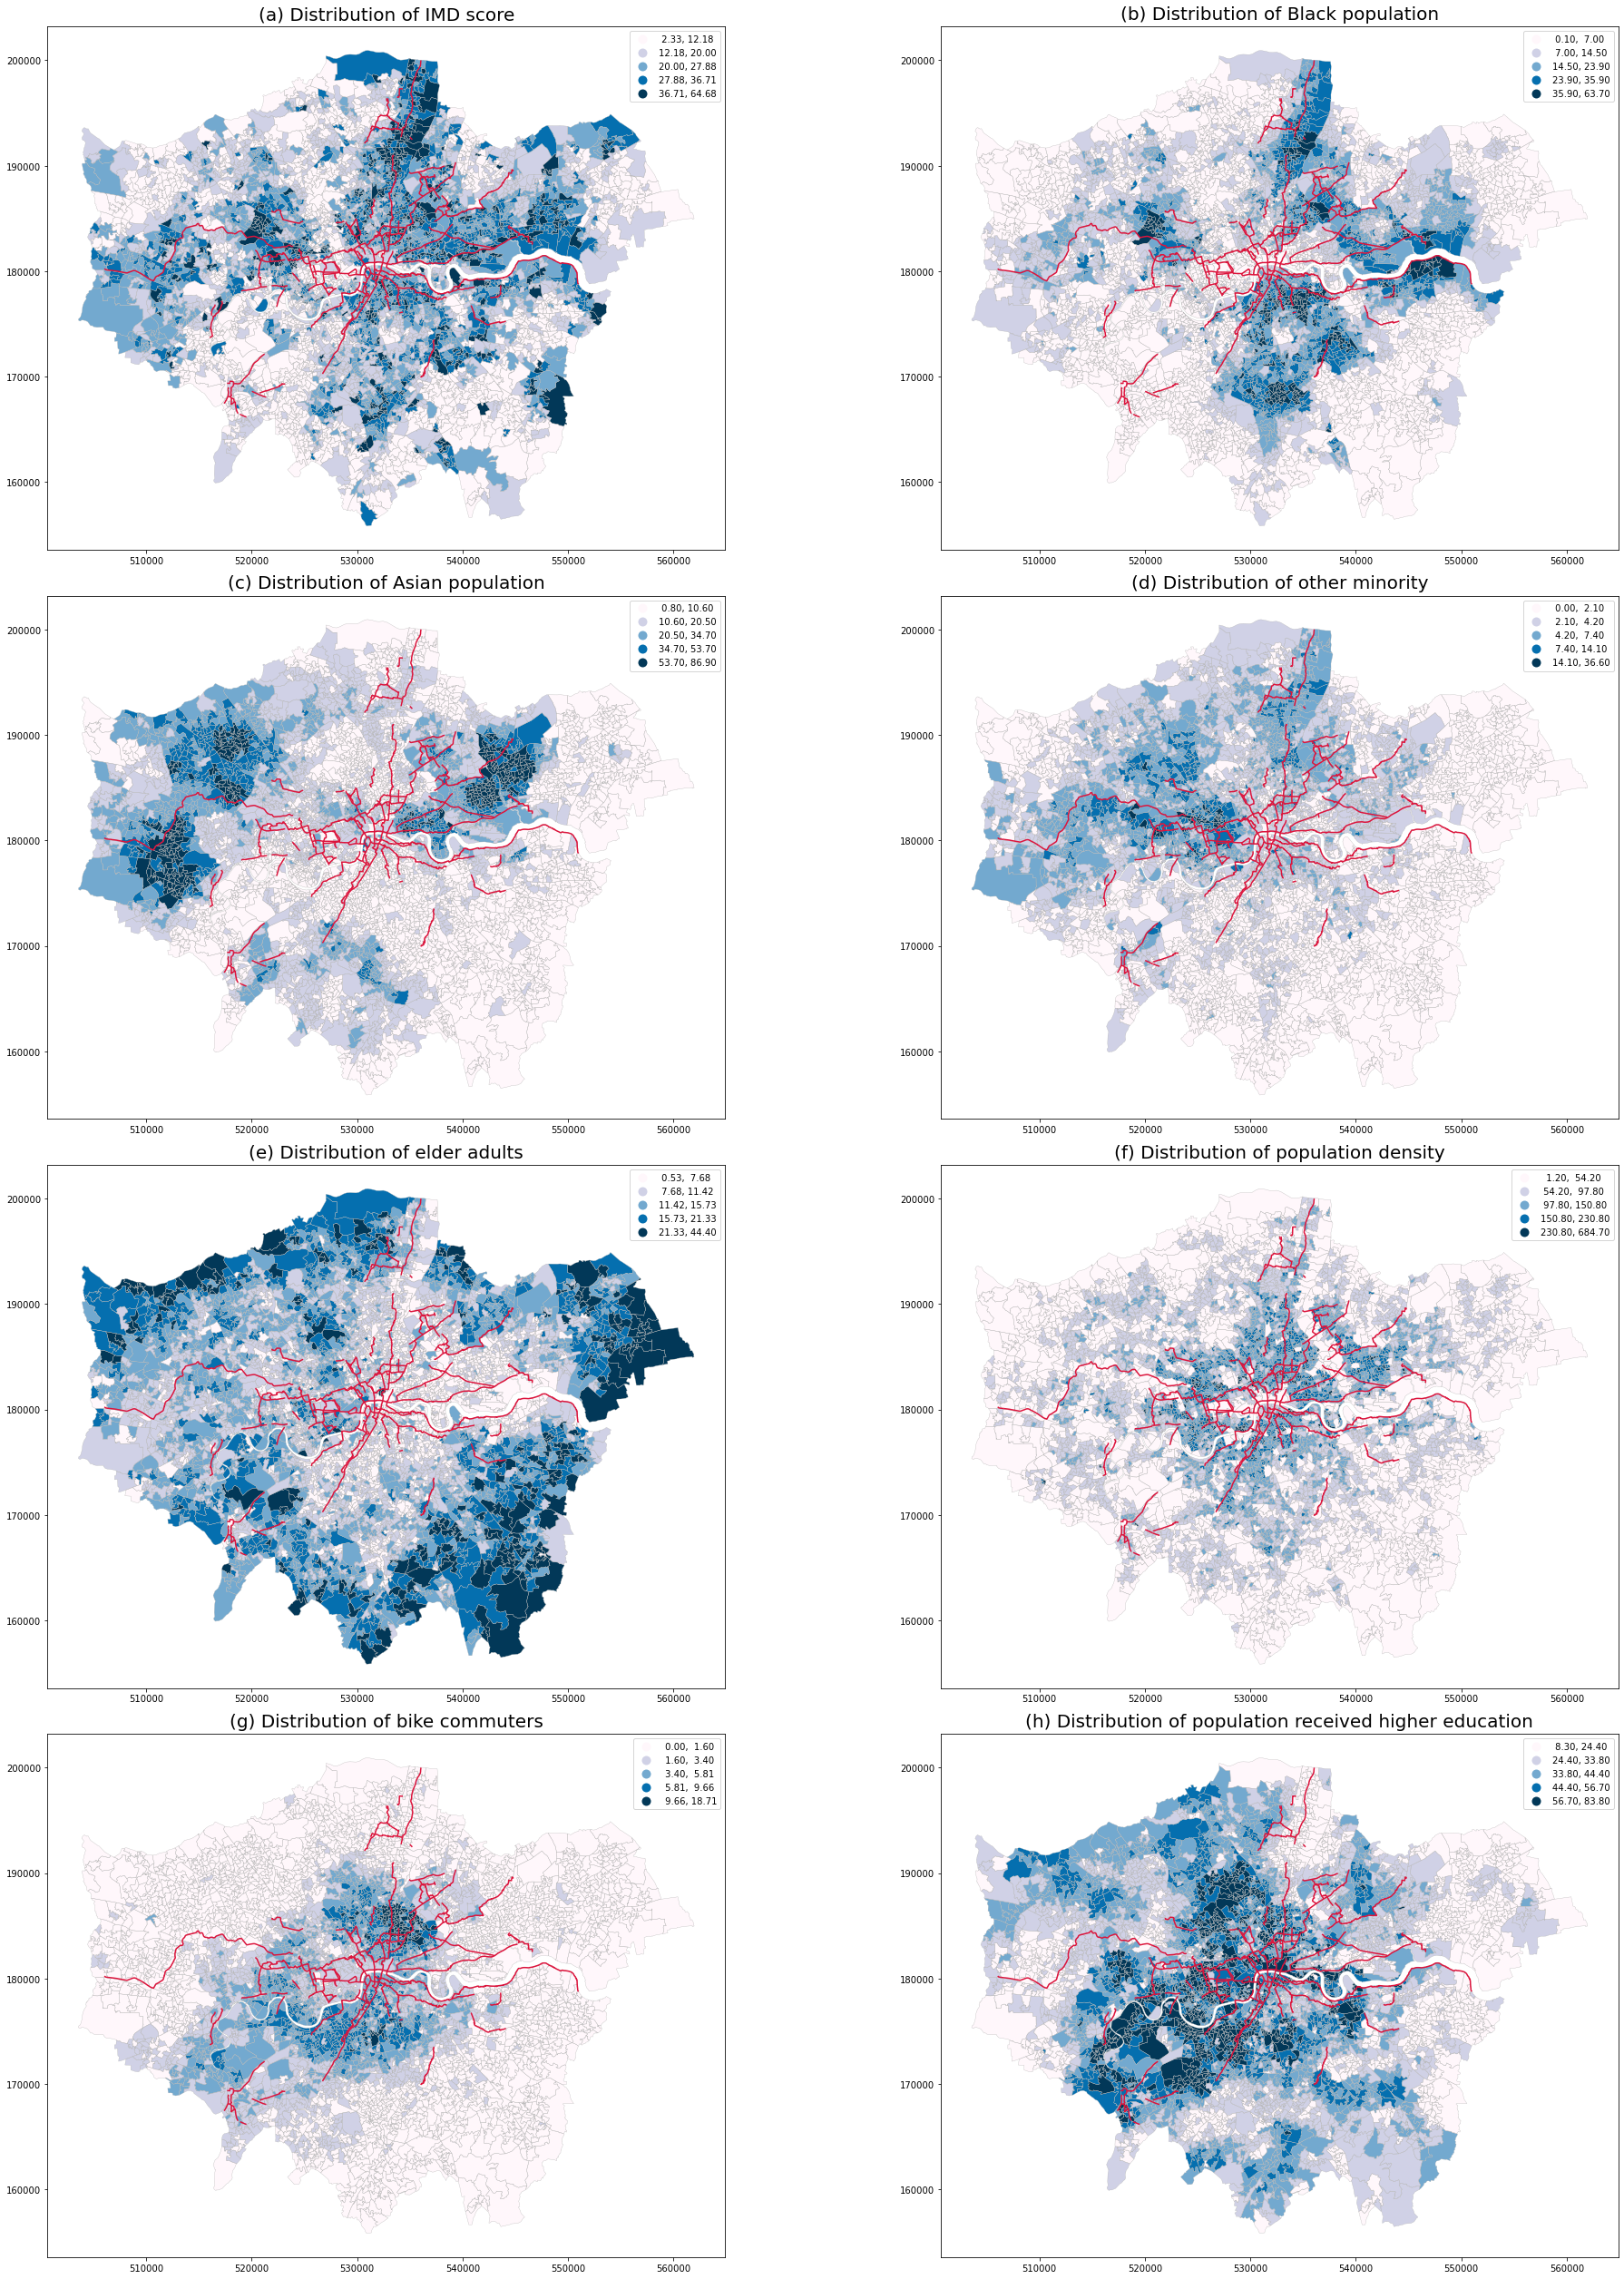

In [13]:
# select the columns needed
columns = [
            "IMD",
            "Black",
            "Asian",
            "Other",
            "age_abv_65",
            "pop_den_area",
            "Commuters",
            'level_4_abv']

# set the titles
titles = ["(a) Distribution of IMD score", 
          '(b) Distribution of Black population',
          "(c) Distribution of Asian population",
          "(d) Distribution of other minority",
          "(e) Distribution of elder adults",
          "(f) Distribution of population density",
          "(g) Distribution of bike commuters",
          "(h) Distribution of population received higher education"
         ]

# create a base axis
fig, ax = plt.subplots(4, 2 , figsize = (30,35))
# flatten the axis
axis = ax.flatten()

# iterate over each the columns selected before
for i, col in enumerate(columns):
    
    # create a map using the column viridis coolwarm fisher_jenks YlGn
    final_gdf.plot(col,ax = axis[i],
                         legend = True,
                         figsize = (12,8), 
                         cmap = 'PuBu',
                         scheme="fisher_jenks"
                   )
    final_gdf.plot(edgecolor='0.7', facecolor='none', linewidth=0.3, ax=axis[i])
    cycle_routes_gdf[cycle_routes_gdf['Status'] == 'Open'].plot(ax=axis[i],
                                                                color='crimson',
                                                                linewidth=1.5)
  
    # add label information
    axis[i].set_title(titles[i], fontsize = 20, pad = 8)

# keep the layout tight
plt.tight_layout()
plt.savefig('IV.png',bbox_inches='tight')

In [14]:
final_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   LSOA11CD                             4835 non-null   object  
 1   geometry                             4835 non-null   geometry
 2   all_routes_presence_400_15           4835 non-null   int64   
 3   all_routes_density_400_15            4835 non-null   float64 
 4   all_distance_15_400                  4835 non-null   float64 
 5   distance_400_15                      4835 non-null   float64 
 6   routes_presence_400                  4835 non-null   int64   
 7   routes_density_400                   4835 non-null   float64 
 8   IMD                                  4835 non-null   float64 
 9   Commuters                            4835 non-null   float64 
 10  persons_hec_13                       4835 non-null   int64   
 11  Mixed    

/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


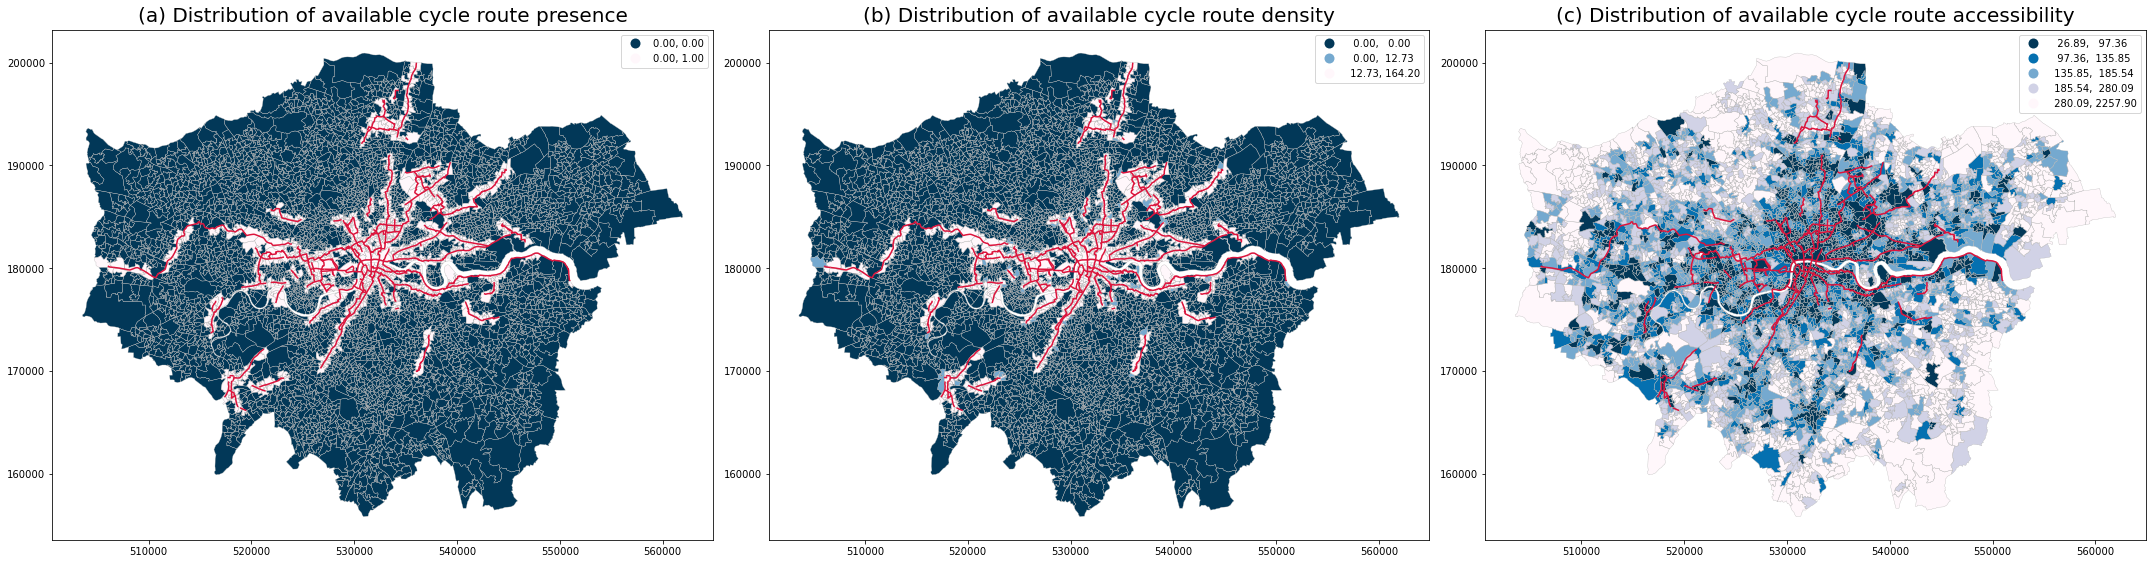

In [25]:
# select the columns needed
columns = [
            "routes_presence_400",
            "routes_density_400",
            "distance_400_15",
            ]

# set the titles
titles = ["(a) Distribution of available cycle route presence", 

          "(b) Distribution of available cycle route density",

          "(c) Distribution of available cycle route accessibility",

         ]

# create a base axis
fig, ax = plt.subplots(1, 3 , figsize = (30,35))
# flatten the axis
axis = ax.flatten()

# iterate over each the columns selected before
for i, col in enumerate(columns):
    
    # create a map using the column viridis coolwarm fisher_jenks YlGn
    final_gdf.plot(col,ax = axis[i],
                         legend = True,
                         figsize = (12,8), 
                         cmap = 'PuBu_r',
                         scheme="quantiles"
                   )
    final_gdf.plot(edgecolor='0.7', facecolor='none', linewidth=0.3, ax=axis[i])
    cycle_routes_gdf[cycle_routes_gdf['Status'] == 'Open'].plot(ax=axis[i],
                                                                color='crimson',
                                                                linewidth=1.5)

  
    # add label information
    axis[i].set_title(titles[i], fontsize = 20, pad = 8)

# keep the layout tight
plt.tight_layout()
plt.savefig('DV_open.png',bbox_inches='tight')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


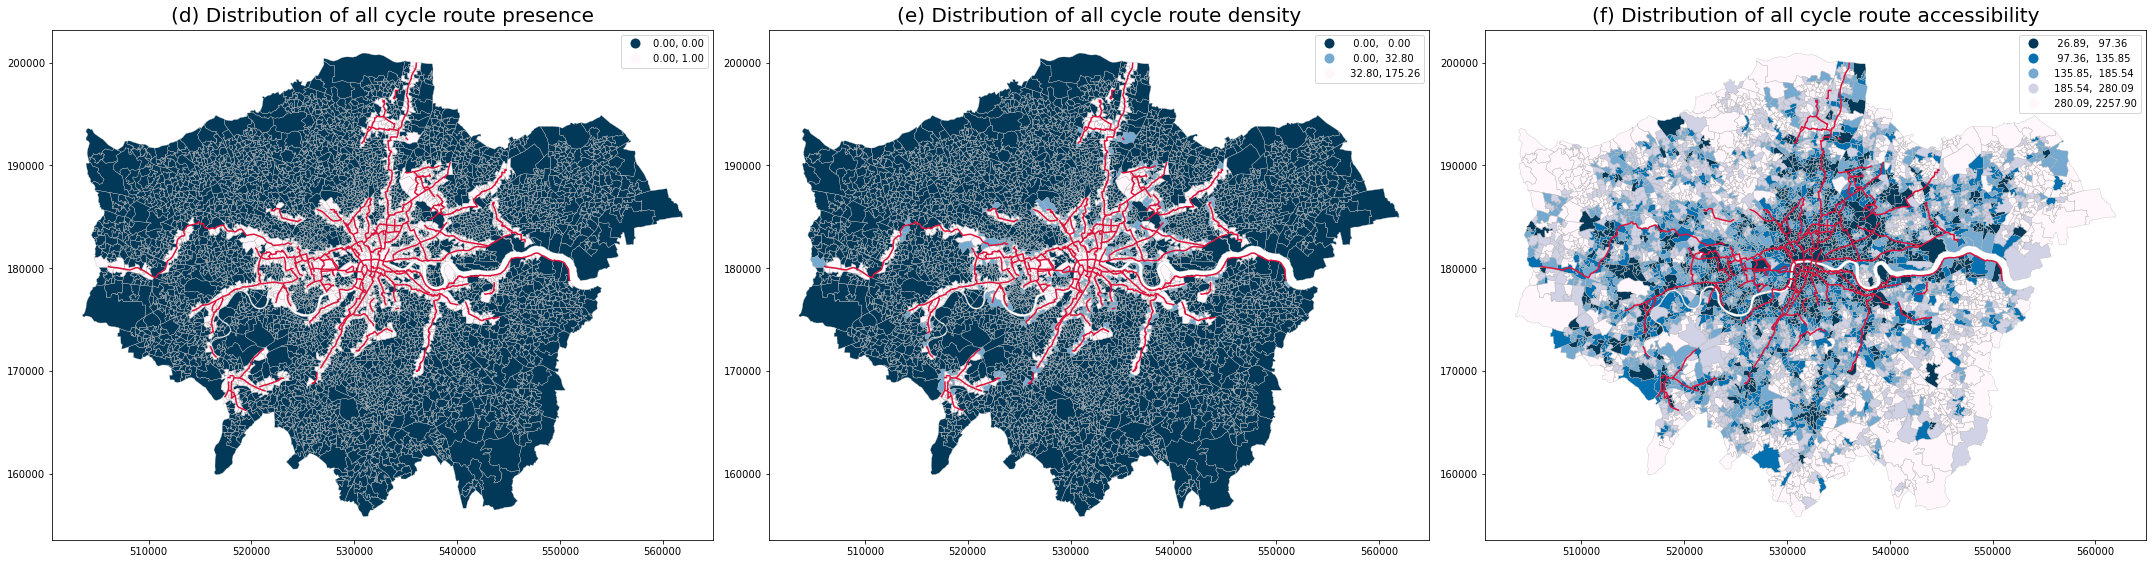

In [27]:
# select the columns needed
columns = [

            "all_routes_presence_400_15",

            "all_routes_density_400_15",

            "all_distance_15_400"
            ]

# set the titles
titles = [
          '(d) Distribution of all cycle route presence',
        
          "(e) Distribution of all cycle route density",

          "(f) Distribution of all cycle route accessibility"
         ]

# create a base axis
fig, ax = plt.subplots(1, 3 , figsize = (30,35))
# flatten the axis
axis = ax.flatten()

# iterate over each the columns selected before
for i, col in enumerate(columns):
    
    # create a map using the column viridis coolwarm fisher_jenks YlGn
    final_gdf.plot(col,ax = axis[i],
                         legend = True,
                         figsize = (12,8), 
                         cmap = 'PuBu_r',
                         scheme="quantiles"
                   )
    final_gdf.plot(edgecolor='0.7', facecolor='none', linewidth=0.3, ax=axis[i])
    cycle_routes_gdf.plot(ax=axis[i],
                                                                color='crimson',
                                                                linewidth=1.5)

  
    # add label information
    axis[i].set_title(titles[i], fontsize = 20, pad = 8)

# keep the layout tight
plt.tight_layout()
plt.savefig('DV_all.png',bbox_inches='tight')